Breast cancer is the most common cancer among women in the world. It account for 25% of all cancer cases, and affected over 2.1 Million people in 2015. It starts when cells in the breast begin to grow out of control. These cells usually form a tumor that can often be seen on an X-ray or felt as a lump.

Early diagnosis significantly increases the chances of surviver. The key challenges against it's detection is how to classify tumors into malignant(Cancer) or benign(not cancer). A tumor is considered malignant (Cancer) if the cells can grow into surrounding tissues or spread to distant areas of the body. A benign tumor does not invade nearby tissue or spread to other parts of the body the way cancer can. But benign tumors can be serious if they press on vital structures such as blood vessel or nerves.

Machine Learning technique can dramatically improve the level of diagnosis in breast cancer. Research shows that experience physicians can detect cancer by 79% accuracy, while 91%(up to 97%) accuracy can be achieved using Machine Learning techniques.

Our Task here would be to classify the tumors into "Malignant (Cancerous)" or "Benign (non-cancerous)" 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

## Attribute Information:

- ID number
- Diagnosis (M = malignant, B = benign)

## Ten real-valued features are computed for each cell nucleus:

- Radius (mean of distances from center to points on the perimeter)
- Texture (standard deviation of gray-scale values)
- Perimeter
- Area
- Smoothness (local variation in radius lengths)
- Compactness (perimeter² / area — 1.0)
- Concavity (severity of concave portions of the contour)
- Concave points (number of concave portions of the contour)
- Symmetry
- Fractal dimension (“coastline approximation” — 1)

## Load dataset and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Import Cancer data from the Sklearn library
# Dataset can also be found here (http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)

from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

C:\Users\i323570\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\i323570\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\i323570\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\i323570\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
breast_cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
df_breast_cancer = pd.DataFrame(np.c_[breast_cancer_data['data'] , breast_cancer_data['target']] , columns = np.append( breast_cancer_data['feature_names'] , ['target']) )



## Let's do some Exploratory Data analysis

In [4]:
print(df_breast_cancer.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [5]:
df_breast_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [6]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

## Lets Visualize the data

We will use a pairpolt from the seaborn library. It is also called as a scatterplot matrix.

<Figure size 432x288 with 0 Axes>

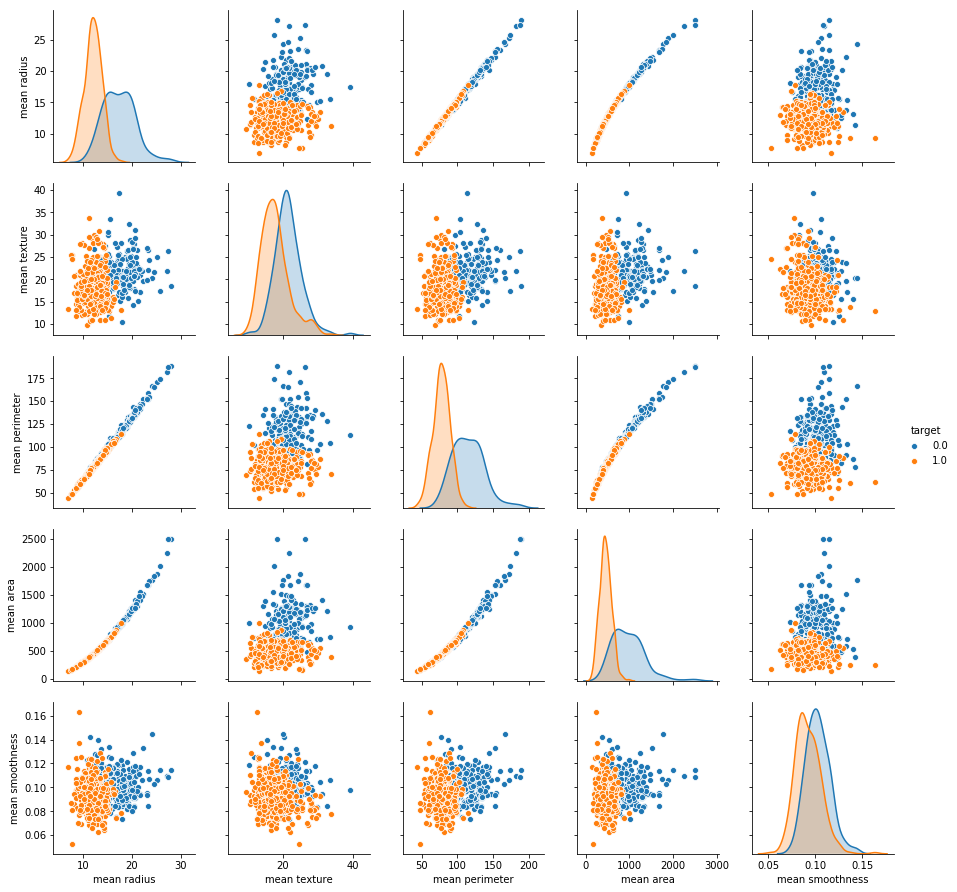

In [7]:
plt.figure()
sns.pairplot(data=df_breast_cancer, hue= 'target',vars= ['mean radius' , 'mean texture' ,'mean perimeter' ,'mean area' , 'mean smoothness'] )
plt.savefig("cancer_data_pairplot.png")

#### Note:

1.0 (Orange) = Benign (No Cancer)

0.0 (Blue) = Malignant (Cancer)

### Let's count the total no. of malignant and benign data in the dataset

In [8]:
print(df_breast_cancer['target'].value_counts())

1.0    357
0.0    212
Name: target, dtype: int64


### Plot it

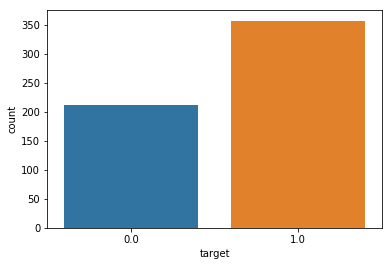

In [9]:
sns.countplot(df_breast_cancer.target , label='Count')

### Let's find the correlation between the features using a heatmap

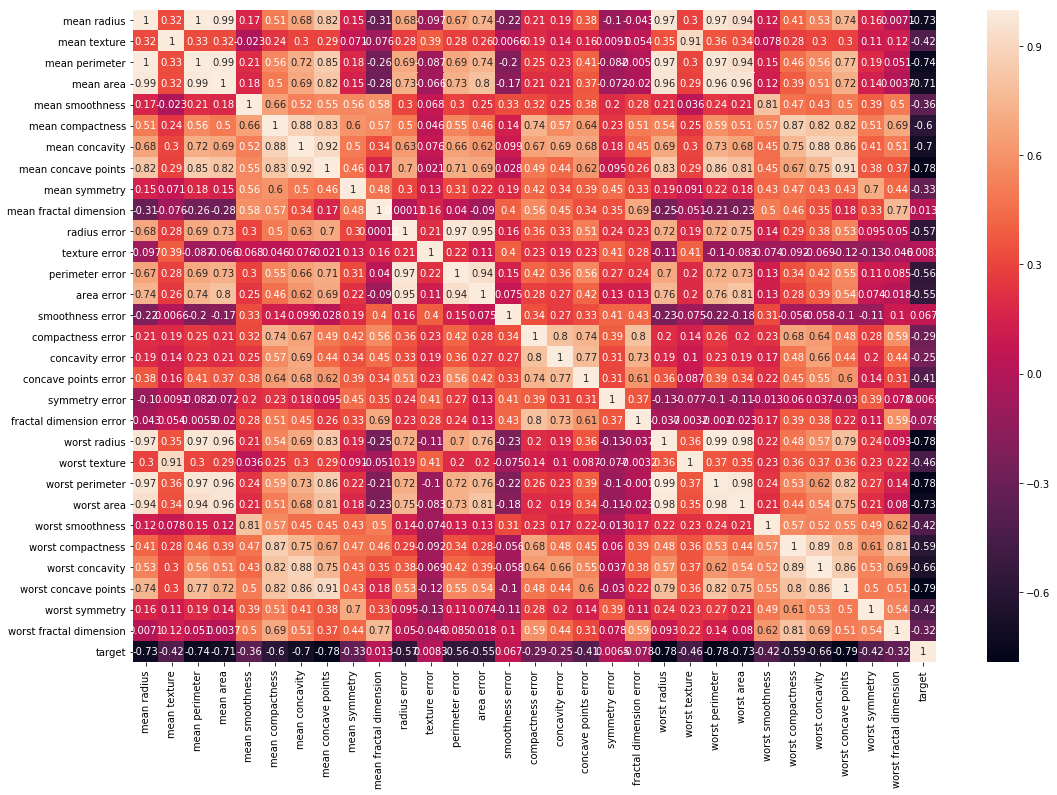

In [10]:
plt.figure(figsize=(18,12))
sns.heatmap(df_breast_cancer.corr(), annot=True)

## We will now use Support Vector Machine (SVM) in order to classify whether a tumor is cancerous or not

In [11]:
df_features = df_breast_cancer.iloc[: , 0:-1] # The 'target' is dropped in order to train the model

df_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df_target = df_breast_cancer.target
df_target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

## Let's create the training and testing data

In [13]:
from sklearn.model_selection import train_test_split

df_features_train, df_features_test , df_target_train , df_target_test = train_test_split( df_features ,df_target , test_size = 0.2 , random_state = 20 )

Check the shape of the training and testing datasets

In [14]:
df_features_train.shape

(455, 30)

In [15]:
df_features_test.shape

(114, 30)

In [16]:
df_target_train.shape

(455,)

In [17]:
df_target_test.shape

(114,)

## Creating the model

In [18]:
from sklearn.svm import SVC

svc_model = SVC()

Training the dataset

In [19]:
svc_model.fit(df_features_train , df_target_train)

C:\Users\i323570\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Predict using the testing set

In [21]:
target_predicted_values = svc_model.predict(df_features_test)

### We can check the performance of our model using a Confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix , classification_report

conf_matrix = np.array(confusion_matrix(df_target_test, target_predicted_values ,labels=[1,0] ) )
df_confusion = pd.DataFrame(conf_matrix , index=['is_cancerous' , 'is_healthy'] , 
                           columns=['predicted_cancerous' , 'predicted_healthy'] )

df_confusion


,predicted_cancerous,predicted_healthy
is_cancerous,66,0
is_healthy,48,0


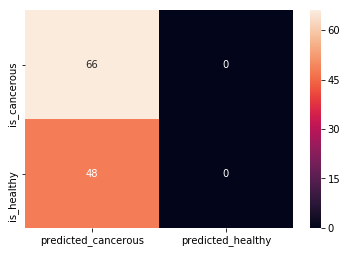

In [23]:
sns.heatmap(df_confusion, annot=True)

In [24]:
print(classification_report(df_target_test , target_predicted_values))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        48
         1.0       0.58      1.00      0.73        66

   micro avg       0.58      0.58      0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



C:\Users\i323570\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\i323570\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\i323570\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Let's check the accuracy score

In [30]:
from sklearn.metrics import accuracy_score
print('The SVM\'s accuracy in predicting is:{:,.2f} %'.format(accuracy_score(df_target_test ,target_predicted_values )*100 )   )

The SVM's accuracy in predicting is:57.89 %


## The Accuracy is not the very best , we have to look into ways of improving that

#### We can look into normalizing data i.e we can bring all values into the range of [0.,1]
#### X’ = (X-X_min) / (X_max — X_min)

### Normalize Training Data

In [31]:
df_features_train_min = df_features_train.min()
df_features_train_min

mean radius                  6.981000
mean texture                10.380000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.490000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [32]:
df_features_train_max = df_features_train.max()
df_features_train_max

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.14470
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09296
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [34]:
df_features_train_normalized = (df_features_train - df_features_train_min) / (df_features_train_max - df_features_train_min)

In [36]:
df_features_train_normalized.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
412,0.114345,0.391003,0.110290,0.053150,0.293907,0.126219,0.087512,0.025487,0.108081,0.401860,...,0.072394,0.418354,0.080681,0.028460,0.247177,0.156601,0.149201,0.088110,0.192682,0.242818
461,0.967343,0.549827,0.988943,1.000000,0.605735,0.550334,0.851687,0.839463,0.505556,0.145814,...,1.000000,0.509582,1.000000,1.000000,0.426137,0.386442,0.545767,0.902062,0.255643,0.126131
532,0.317052,0.205882,0.303849,0.183245,0.435973,0.163088,0.041050,0.093439,0.288384,0.269535,...,0.281750,0.208097,0.254943,0.144564,0.364723,0.125263,0.096326,0.299107,0.294844,0.149416
495,0.373373,0.340138,0.361620,0.227953,0.469643,0.196522,0.159888,0.246074,0.215657,0.174884,...,0.287442,0.431579,0.266398,0.147070,0.333025,0.108188,0.135783,0.349485,0.191019,0.071822
13,0.419755,0.469550,0.414000,0.271135,0.340828,0.247899,0.232849,0.266600,0.397475,0.079535,...,0.316969,0.409447,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536,0.295557,0.051358


### Normalize Testing Data

In [38]:
df_features_test_min = df_features_test.min()
df_features_test_min

mean radius                  8.196000
mean texture                 9.710000
mean perimeter              51.710000
mean area                  201.900000
mean smoothness              0.072740
mean compactness             0.034540
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.133900
mean fractal dimension       0.050250
radius error                 0.134400
texture error                0.406400
perimeter error              0.981200
area error                   8.205000
smoothness error             0.002826
compactness error            0.003746
concavity error              0.000000
concave points error         0.000000
symmetry error               0.010130
fractal dimension error      0.001345
worst radius                 8.964000
worst texture               12.020000
worst perimeter             57.260000
worst area                 242.200000
worst smoothness             0.084090
worst compactness            0.047120
worst concav

In [39]:
df_features_test_max = df_features_test.max()
df_features_test_max

mean radius                  25.73000
mean texture                 28.23000
mean perimeter              174.20000
mean area                  2010.00000
mean smoothness               0.16340
mean compactness              0.28390
mean concavity                0.33680
mean concave points           0.19130
mean symmetry                 0.25970
mean fractal dimension        0.09744
radius error                  1.20700
texture error                 2.92700
perimeter error               7.73300
area error                  224.10000
smoothness error              0.02177
compactness error             0.10640
concavity error               0.10270
concave points error          0.02771
symmetry error                0.05963
fractal dimension error       0.02286
worst radius                 33.13000
worst texture                40.54000
worst perimeter             229.30000
worst area                 3234.00000
worst smoothness              0.20980
worst compactness             0.86630
worst concav

In [41]:
df_features_test_normalized = ( df_features_test - df_features_test_min) / (df_features_test_max - df_features_test_min)
df_features_test_normalized.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
269,0.143379,0.576674,0.145236,0.079089,0.391132,0.378409,0.250831,0.149869,0.261526,0.389277,...,0.112803,0.462482,0.111893,0.056220,0.393047,0.253766,0.344997,0.296245,0.181283,0.243578
263,0.422836,0.522138,0.394236,0.307892,0.062431,0.086702,0.124970,0.148824,0.165342,0.088578,...,0.370190,0.688990,0.340851,0.249482,0.193382,0.163066,0.307692,0.295143,0.197117,0.078906
30,0.595072,0.831533,0.596702,0.490072,0.371277,0.618223,0.688539,0.650288,0.670906,0.248358,...,0.587023,0.771038,0.600093,0.477238,0.517143,0.462145,0.834990,0.636583,0.351604,0.338670
452,0.216950,1.000000,0.204588,0.133068,0.128281,0.120148,0.120398,0.101673,0.219396,0.228650,...,0.170736,0.906732,0.161648,0.094091,0.292021,0.169047,0.246562,0.245126,0.149208,0.198980
214,0.341850,0.761339,0.336027,0.226094,0.241452,0.385226,0.331057,0.337794,0.712242,0.298368,...,0.326740,0.800491,0.335620,0.190220,0.571235,0.437975,0.509735,0.610403,0.611449,0.380718


### Training the SVM with the new normalized data

In [42]:
svc_model = SVC()
svc_model.fit(df_features_train_normalized , df_target_train)

C:\Users\i323570\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
df_target_predicted_after_normalization = svc_model.predict(df_features_test_normalized)

conf_matrix = np.array(confusion_matrix(df_target_test, df_target_predicted_after_normalization ,labels=[1,0] ) )
df_confusion = pd.DataFrame(conf_matrix , index=['is_cancerous' , 'is_healthy'] , 
                           columns=['predicted_cancerous' , 'predicted_healthy'] )

df_confusion

,predicted_cancerous,predicted_healthy
is_cancerous,66,0
is_healthy,1,47


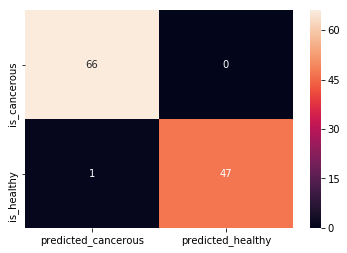

In [44]:
sns.heatmap(df_confusion, annot=True)

In [45]:
print('The SVM\'s accuracy in predicting is:{:,.2f} %'.format(accuracy_score(df_target_test ,df_target_predicted_after_normalization )*100 )   )

The SVM's accuracy in predicting is:99.12 %


In [46]:
print(classification_report(df_target_test , df_target_predicted_after_normalization))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        66

   micro avg       0.99      0.99      0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



## We now have an accuracy of 99.12 %